# DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('accidents.csv')#, nrows=100000) 
#this data set is pretty big so feel free to explore just a subset

In [3]:
### Random Sampling
#subset = data.sample(n=100000)

### Export this DataFrame to a csv for easy access.
#subset.to_csv(r'/Users/levantisgio/Desktop/Sample_US_Accidents_Dec21.csv', index=False, header=True)  


###  DATA PREPROCESSING / EXPLORATION 

In [7]:
data.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
data.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
# check the no. of columns & rows
print('The Sample Dataset Contains, Rows: {:,d} & Columns: {}'
      .format(data.shape[0], data.shape[1]))

The Sample Dataset Contains, Rows: 2,845,342 & Columns: 47


In [10]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
# Next, we need an overview of the data types for each column-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [12]:
# The above list ends by saying that there are 3 bool, 13 float64, 1 int64, 20 objects.

##### SUMMARY STATISTICS

In [14]:
data.describe() 
#The data has 14 numeric columns while the rest are categorical variables.


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [15]:
# We need the total numbers for each column in descending order
data.isna().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [16]:
#Create variable to present the percentages of every column with missing values
missing_percentages = data.isna().sum().sort_values(ascending = False)/len(data)

#sorting out the ones with zeros
missing_percentages[missing_percentages != 0]



Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot: >

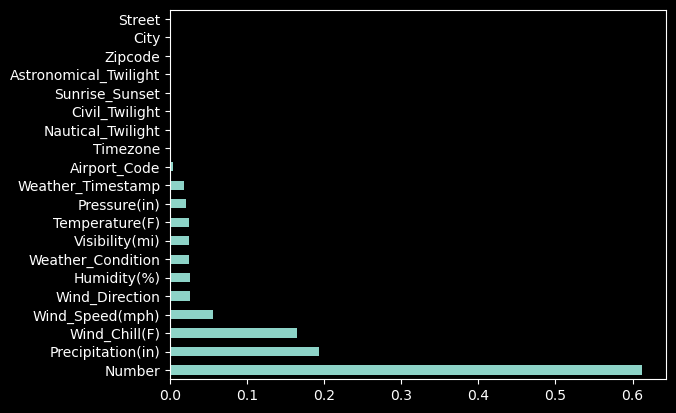

In [17]:
missing_percentages[missing_percentages != 0].plot.barh(x='lab', y='val')

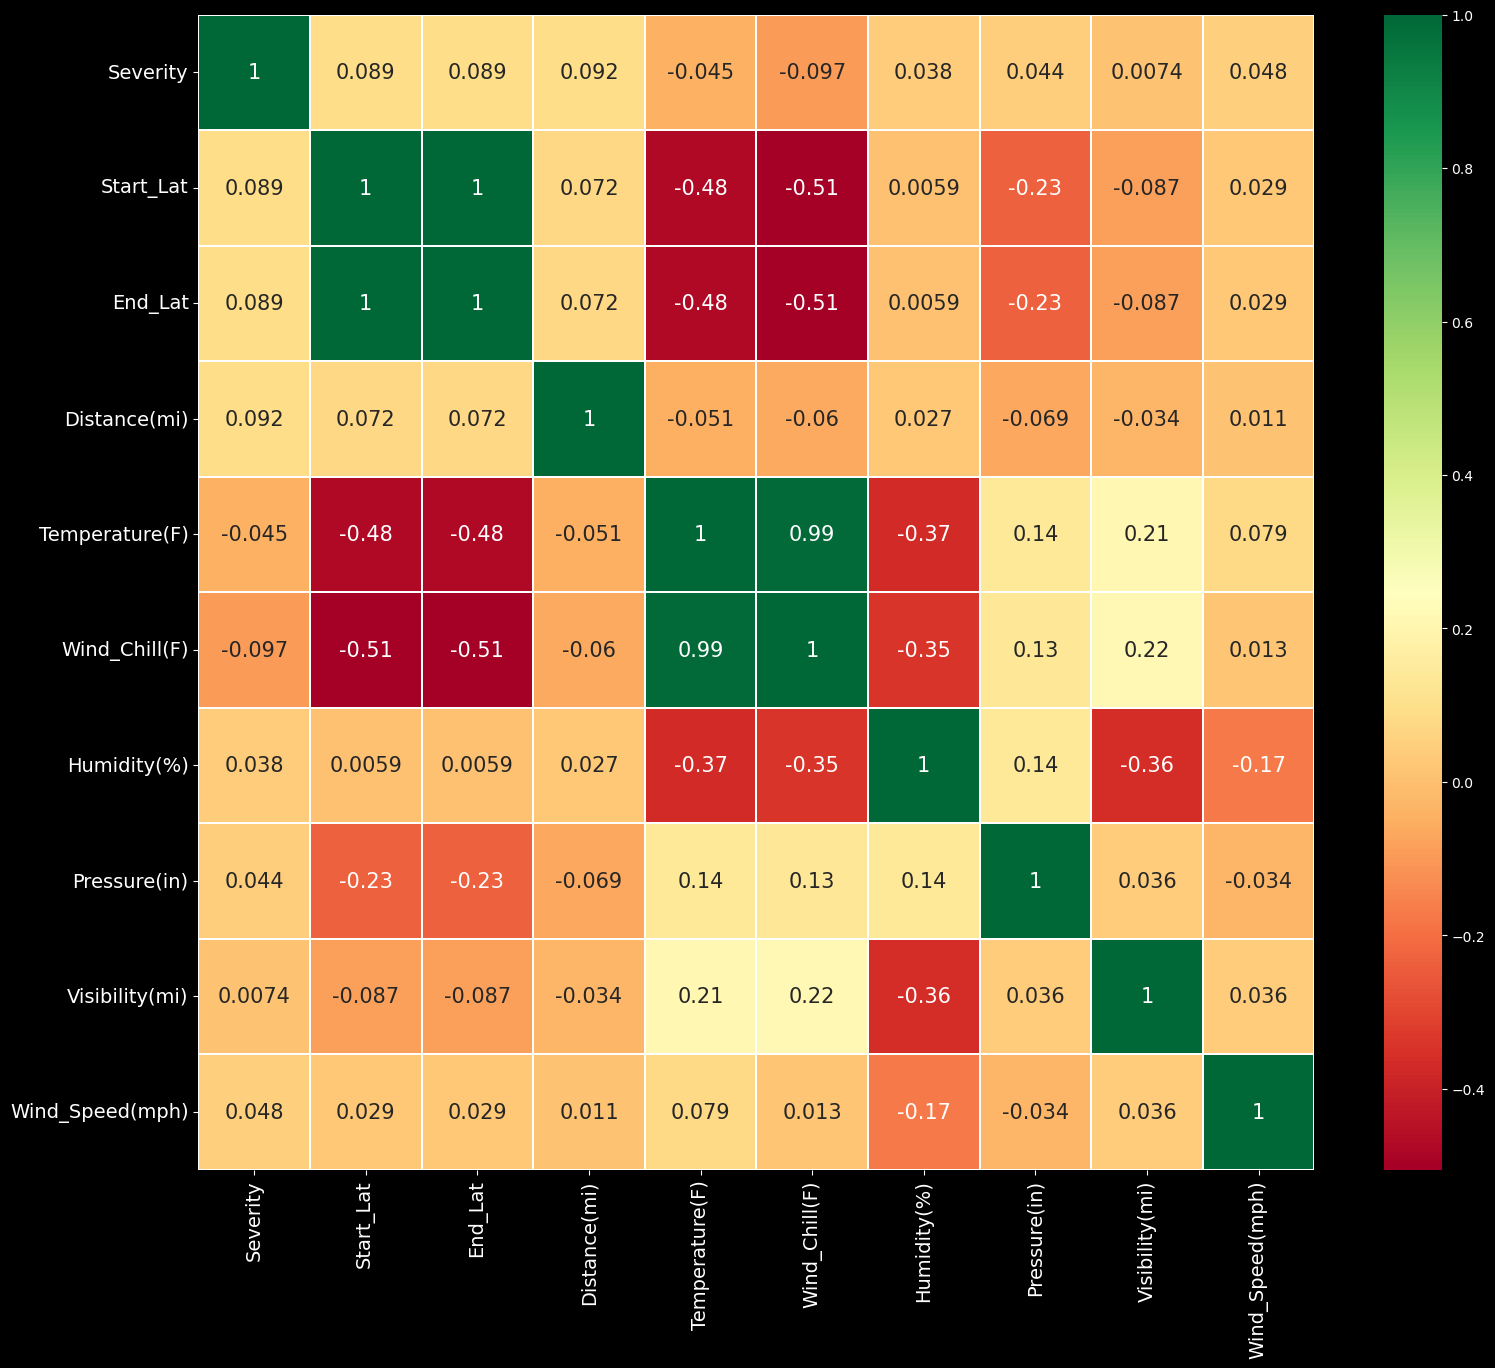

In [18]:
fig=seaborn.heatmap(data[['Severity','Start_Lat','End_Lat','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
# Exclude unnecessary columns
exclude = ["End_Lat","End_Lng","Precipitation(in)","Description","Number","Street","Timezone",
           "Airport_Code","Weather_Timestamp","Civil_Twilight",
           "Nautical_Twilight","Astronomical_Twilight"]
data = data.drop(exclude,axis=1)

In [20]:
'''
To prepare the dataset for further analysis, some additional columns are added:

Time_Diff: Time difference between start time and end time of the accident
Year: Year of start time
Month: Month of start time
Day: Day of start time
Hour: Hour of start time
'''
# To see the trends of accidents over the years, months klp

data['acc_year'] = pd.to_datetime(data['Start_Time']).dt.year
data['acc_month'] = pd.to_datetime(data['Start_Time']).dt.month
data['acc_hr_day'] = pd.to_datetime(data['Start_Time']).dt.hour

data['new_date'] = pd.to_datetime(data['Start_Time']).dt.date

In [ ]:
data['day_name'] = pd.to_datetime(data['Start_Time']).dt.day_name()

KeyboardInterrupt: 

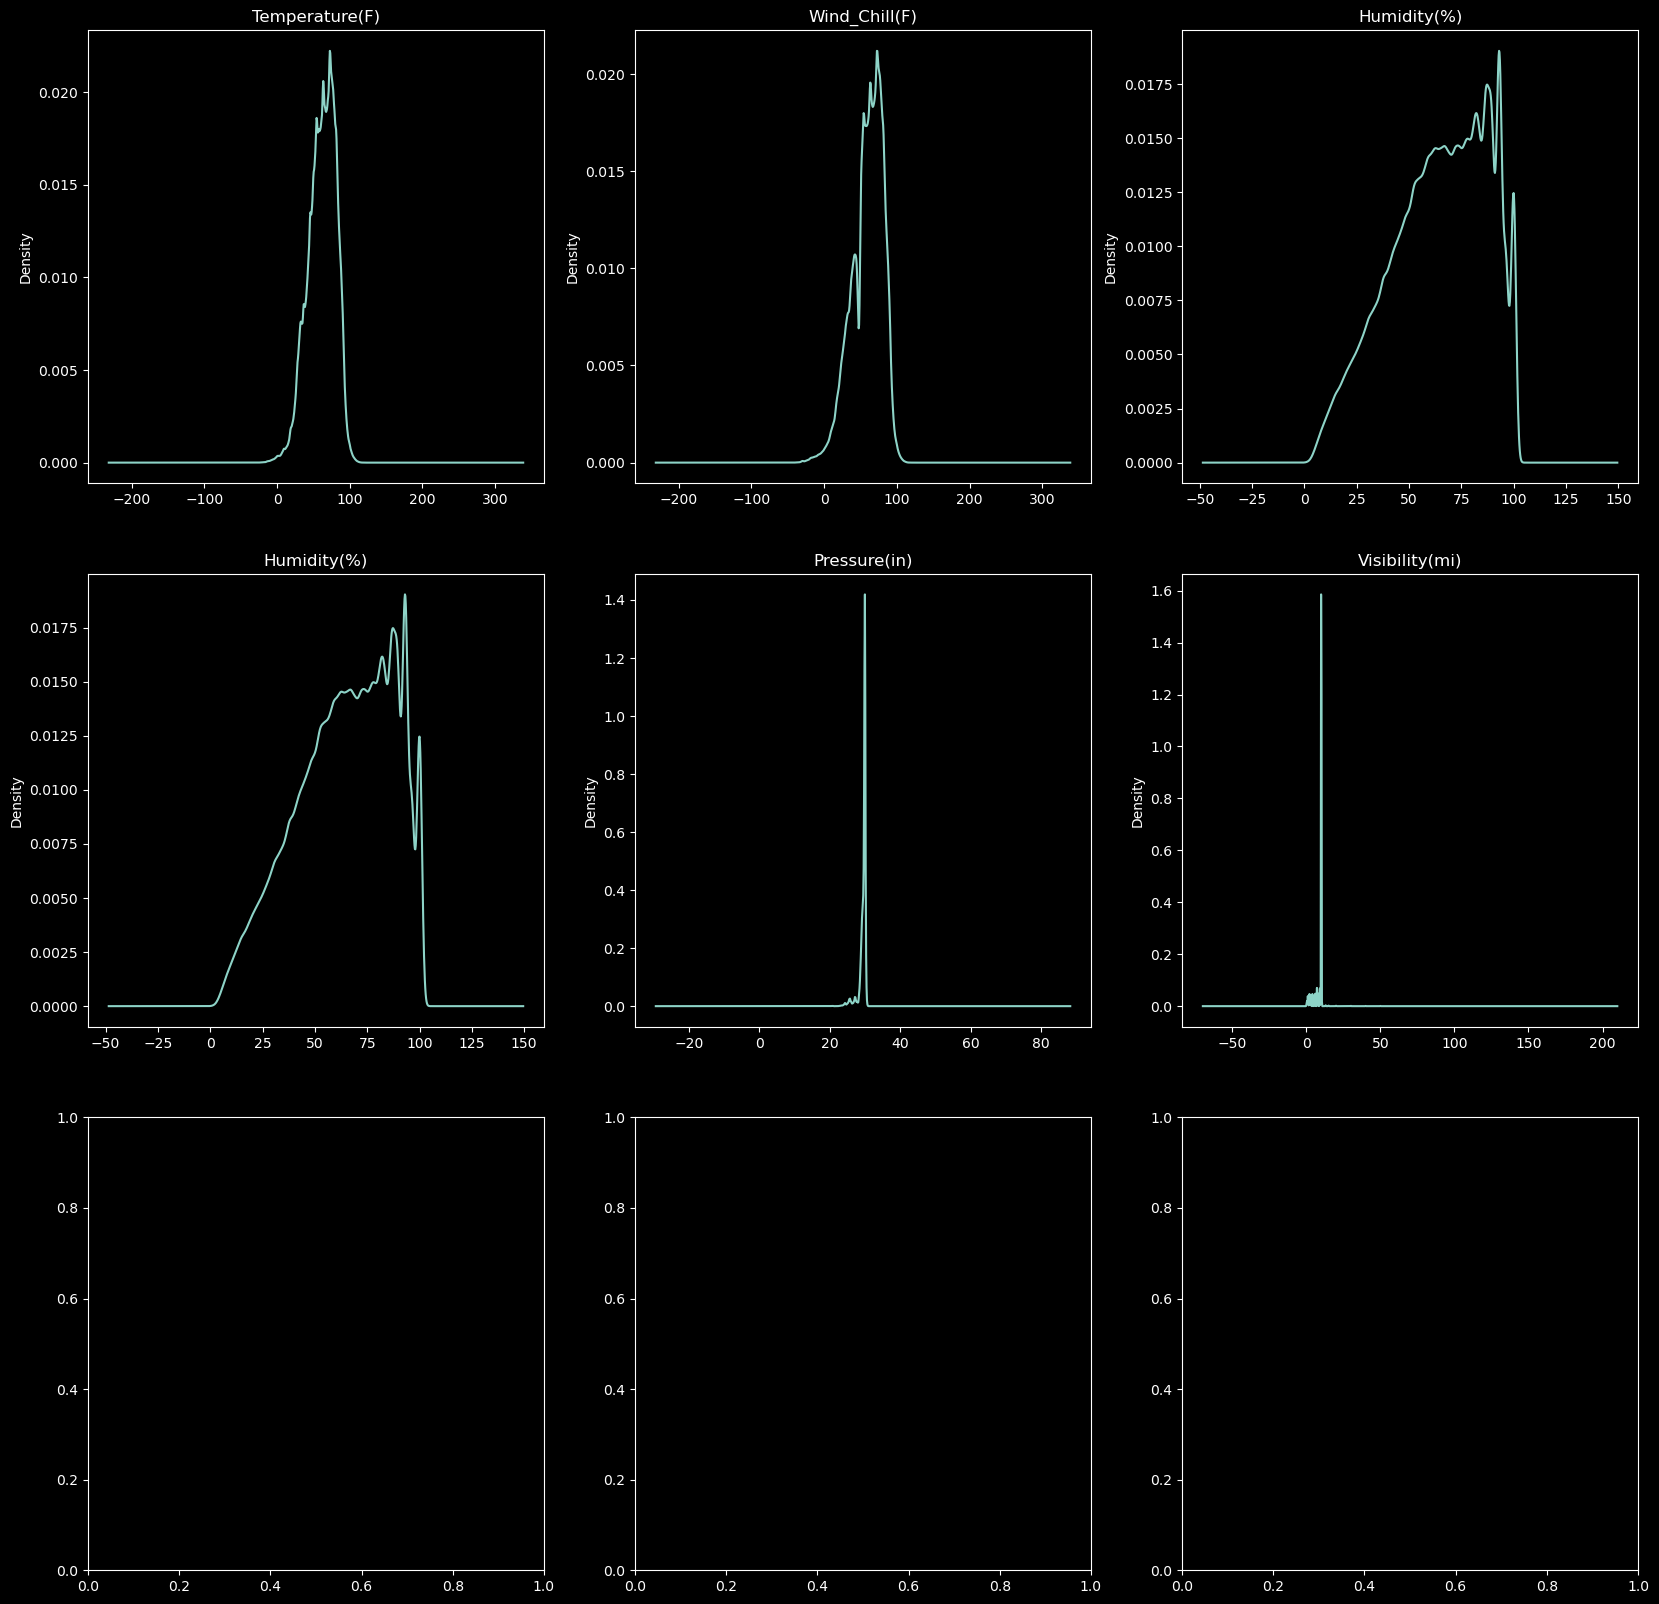

In [22]:
# Features' Density
#SOS this may take many minutes if you use the whole dataset

numeric_feats = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Severity']

fig, ax = plt.subplots(3,3, figsize=(20,20)) 
ax_flat = ax.flatten() 

for idx, feat in enumerate(numeric_feats):
    data[feat].plot.density(ax=ax_flat[idx])
    ax_flat[idx].set_title(feat)

In [23]:
data.Severity.unique()

array([3, 2, 4, 1], dtype=int64)

In [24]:
data.Severity.value_counts(sort=True)

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [37]:
data[data.columns[1:]].corr()['Severity'][:]

Severity           1.000000
Start_Lat          0.089207
Start_Lng          0.114063
Distance(mi)       0.092140
Temperature(F)    -0.045335
Wind_Chill(F)     -0.097459
Humidity(%)        0.037802
Pressure(in)       0.043883
Visibility(mi)     0.007371
Wind_Speed(mph)    0.048382
Amenity           -0.003940
Bump              -0.003739
Crossing          -0.035382
Give_Way           0.008141
Junction           0.045928
No_Exit           -0.002359
Railway           -0.001747
Roundabout        -0.000773
Station           -0.018017
Stop              -0.002536
Traffic_Calming   -0.003009
Traffic_Signal    -0.012798
Turning_Loop            NaN
acc_year          -0.310573
acc_month         -0.070171
acc_hr_day        -0.018171
Name: Severity, dtype: float64

##### Seeing which counties have the highest number of accidents

In [38]:
data.groupby('County')['ID'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

,County,count
902,Los Angeles,234122
1009,Miami-Dade,143939
1136,Orange,114917
1351,San Bernardino,55018
407,Dallas,50050
...,...,...
882,Leslie,1
895,Live Oak,1
458,Dixon,1
901,Los Alamos,1


##### Getting mean weather conditions for the counties with top accident counts

In [39]:
temp = data.groupby('County')['ID', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)'].agg({'ID':'count', 'Temperature(F)':'mean', 'Wind_Chill(F)':'mean', 'Humidity(%)':'mean', 'Pressure(in)':'mean',
       'Visibility(mi)':'mean', 'Wind_Speed(mph)':'mean'}).reset_index().sort_values(by = 'ID', ascending = False)

C:\Users\konst\AppData\Local\Temp\ipykernel_6812\994957980.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = data.groupby('County')['ID', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',


In [40]:
temp[temp['ID']>20000].head(20)


,County,ID,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
902,Los Angeles,234122,65.720078,65.060048,57.532459,29.621625,8.968928,5.160549
1009,Miami-Dade,143939,78.391741,78.348656,69.539634,30.028776,9.705384,8.871203
1136,Orange,114917,71.047350,70.919947,64.913753,29.921083,9.328095,7.068920
1351,San Bernardino,55018,67.512414,66.871533,45.181878,28.813418,8.552862,6.177034
407,Dallas,50050,67.726448,65.746525,62.446583,29.560336,9.469928,8.934723
1352,San Diego,48366,64.094212,63.472557,65.562919,29.718644,8.918735,6.307663
1330,Sacramento,46708,62.844596,61.856498,58.936934,29.928010,8.963509,6.822104
675,Harris,42559,72.575892,71.735640,67.364525,29.973395,9.225261,8.790589
1299,Riverside,42176,65.475208,64.538847,52.842580,29.045413,9.337597,5.854462
1040,Montgomery,41476,56.565358,54.494520,66.649363,29.683017,9.088293,6.444112


#### Checking the number of accidents per state

In [41]:
'''
- Data Analysis and Visualization:

Once the data is cleaned and prepped for analysis, we take some of the columns
and apply statistical methods to see the underlying picture come to the surface. 
The following columns have been analyzed below:

State, City, Start Time, Temperature, Weather Condition, 
Visibility, Crossing, Traffic Signal and Bump.

'''

'\n- Data Analysis and Visualization:\n\nOnce the data is cleaned and prepped for analysis, we take some of the columns\nand apply statistical methods to see the underlying picture come to the surface. \nThe following columns have been analyzed below:\n\nState, City, Start Time, Temperature, Weather Condition, \nVisibility, Crossing, Traffic Signal and Bump.\n\n'

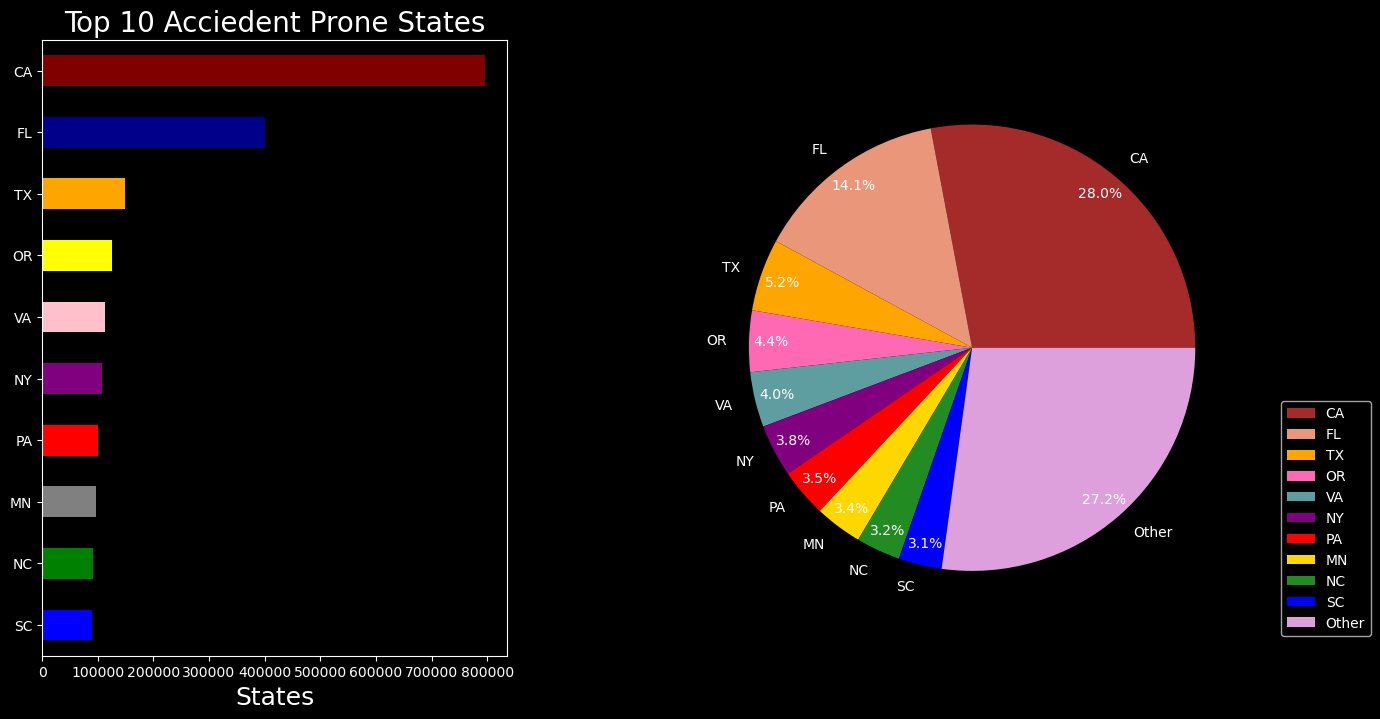

In [44]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "green", "grey", "red", "purple",'pink','yellow','orange','darkblue','maroon')
data.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=data['State'].value_counts()
groups=list(data['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
plt.show()

#### Checking the number of accidents per City

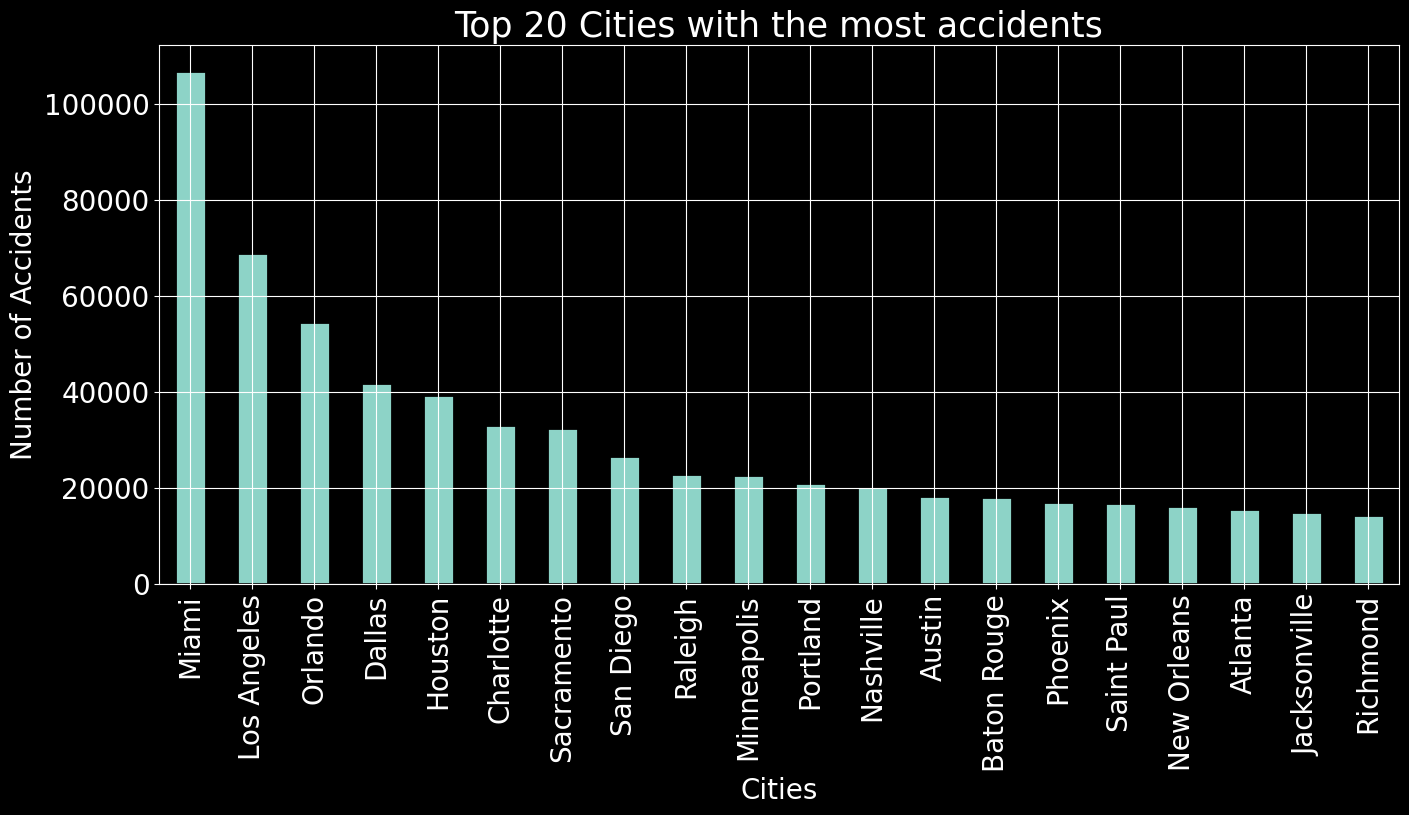

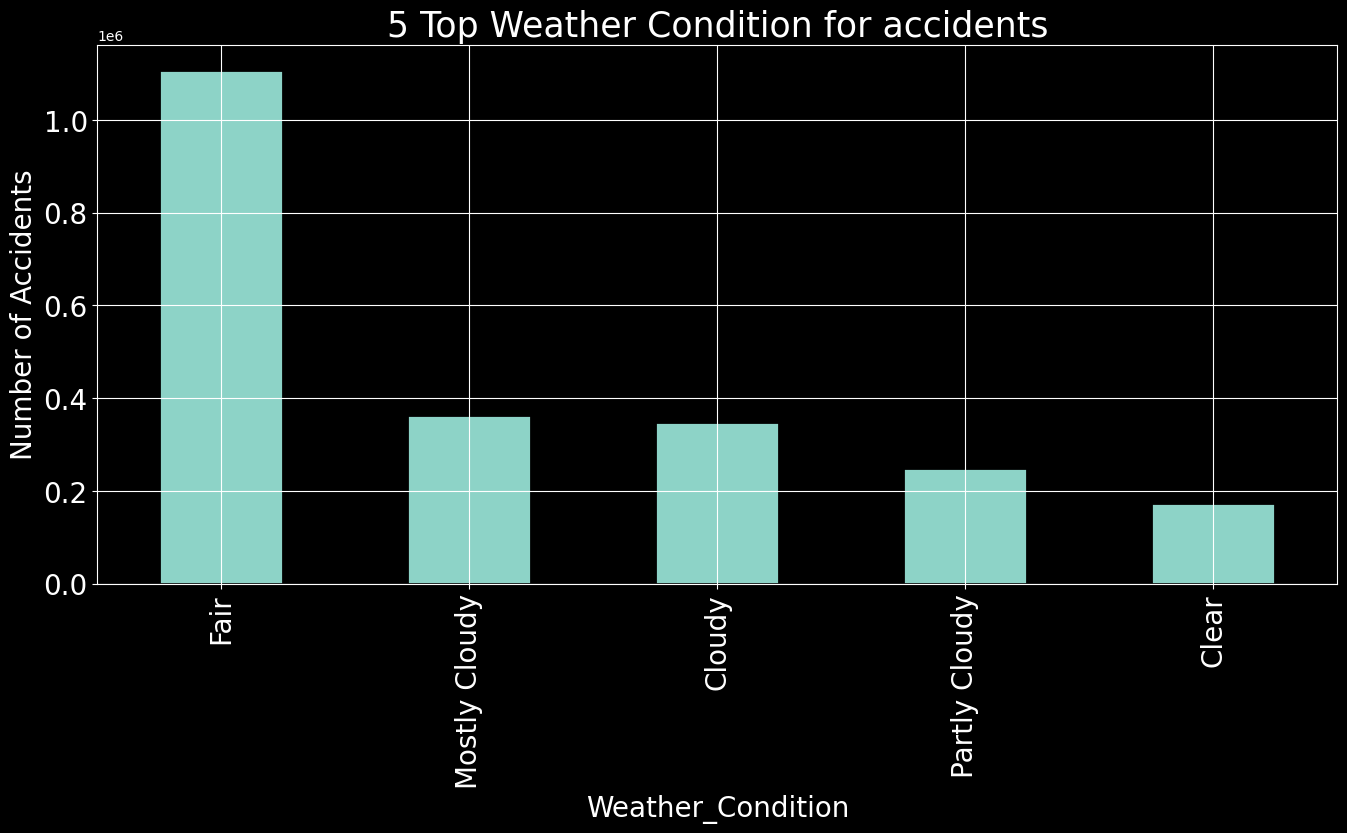

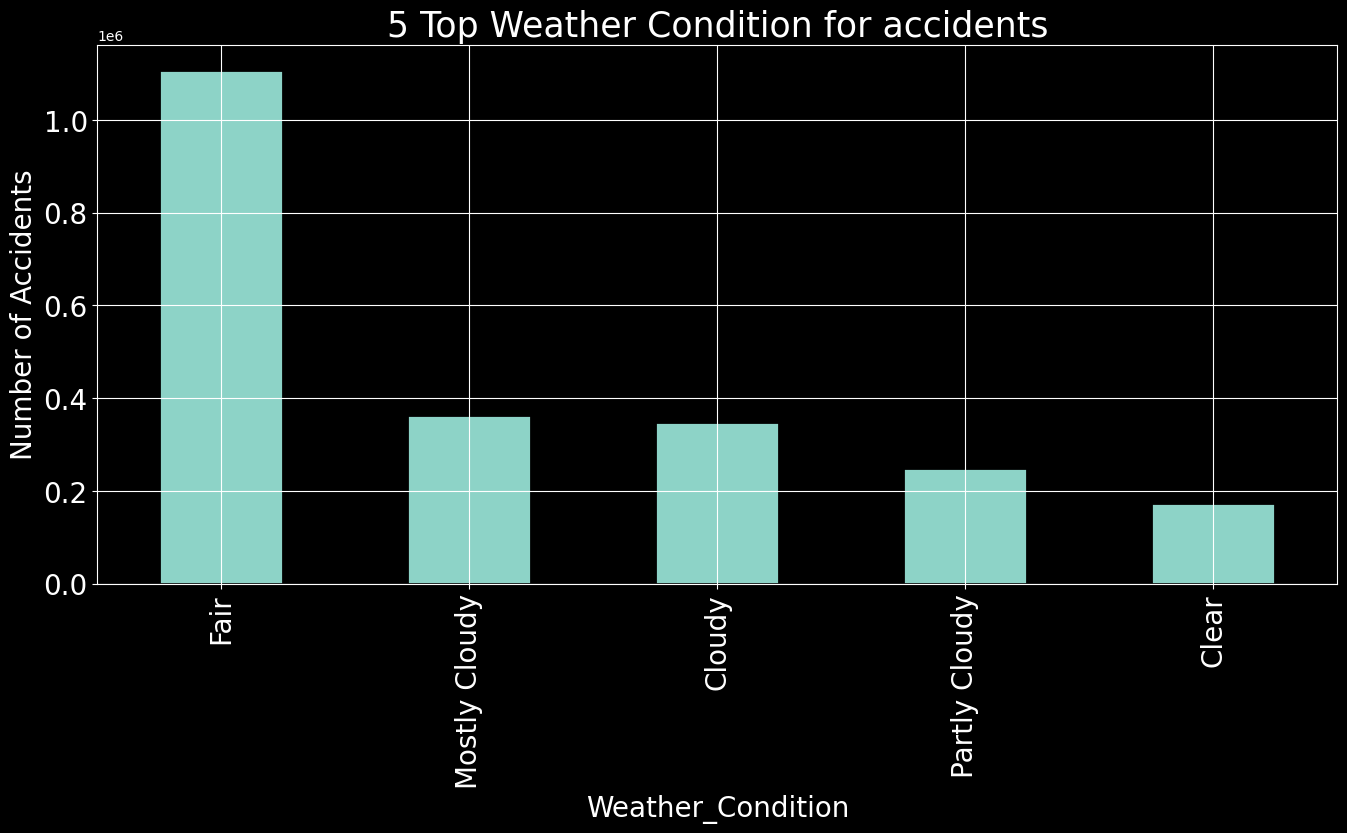

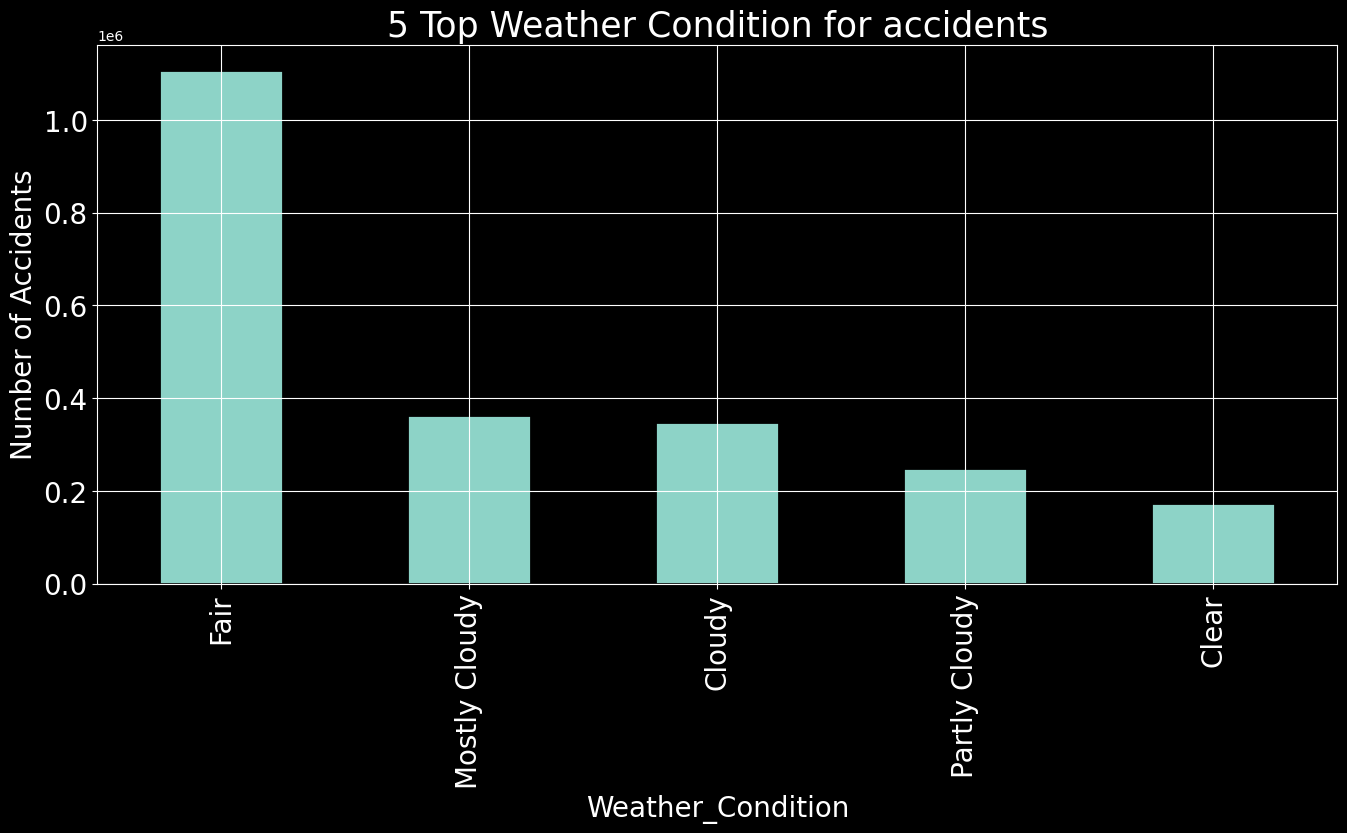

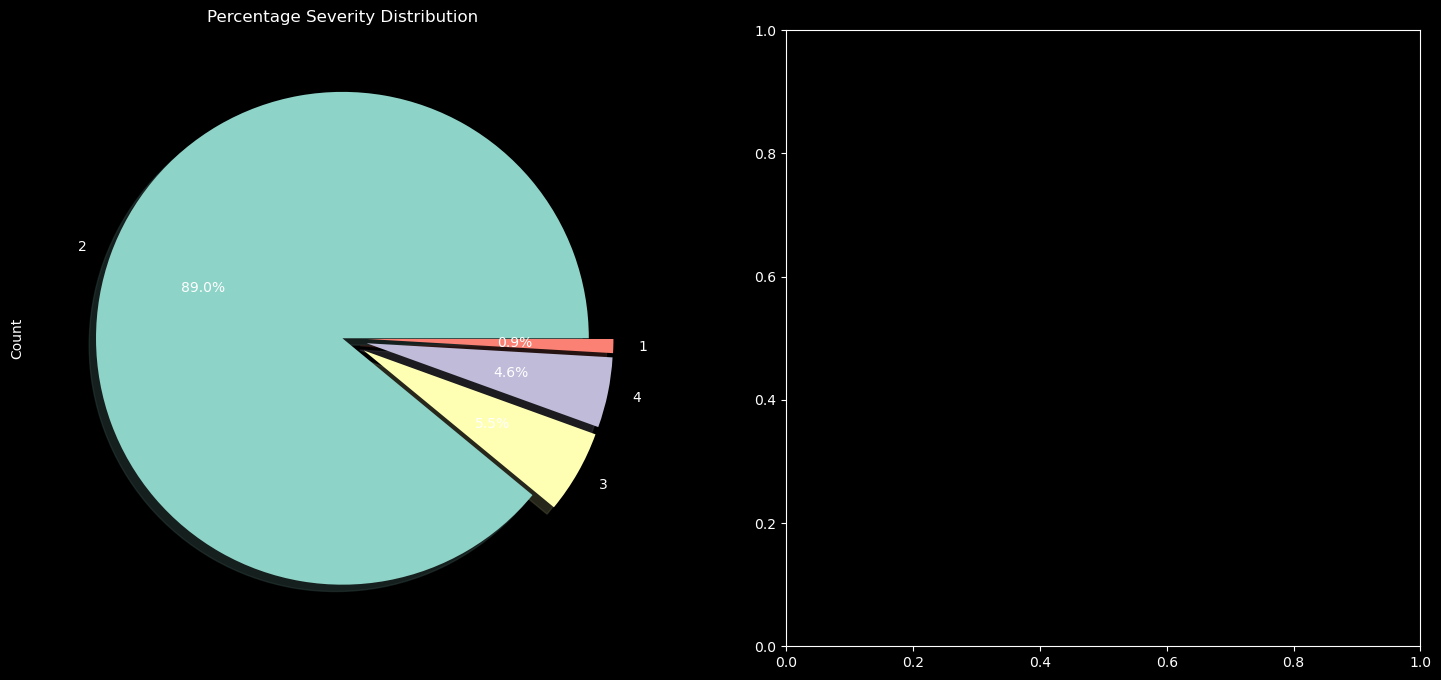

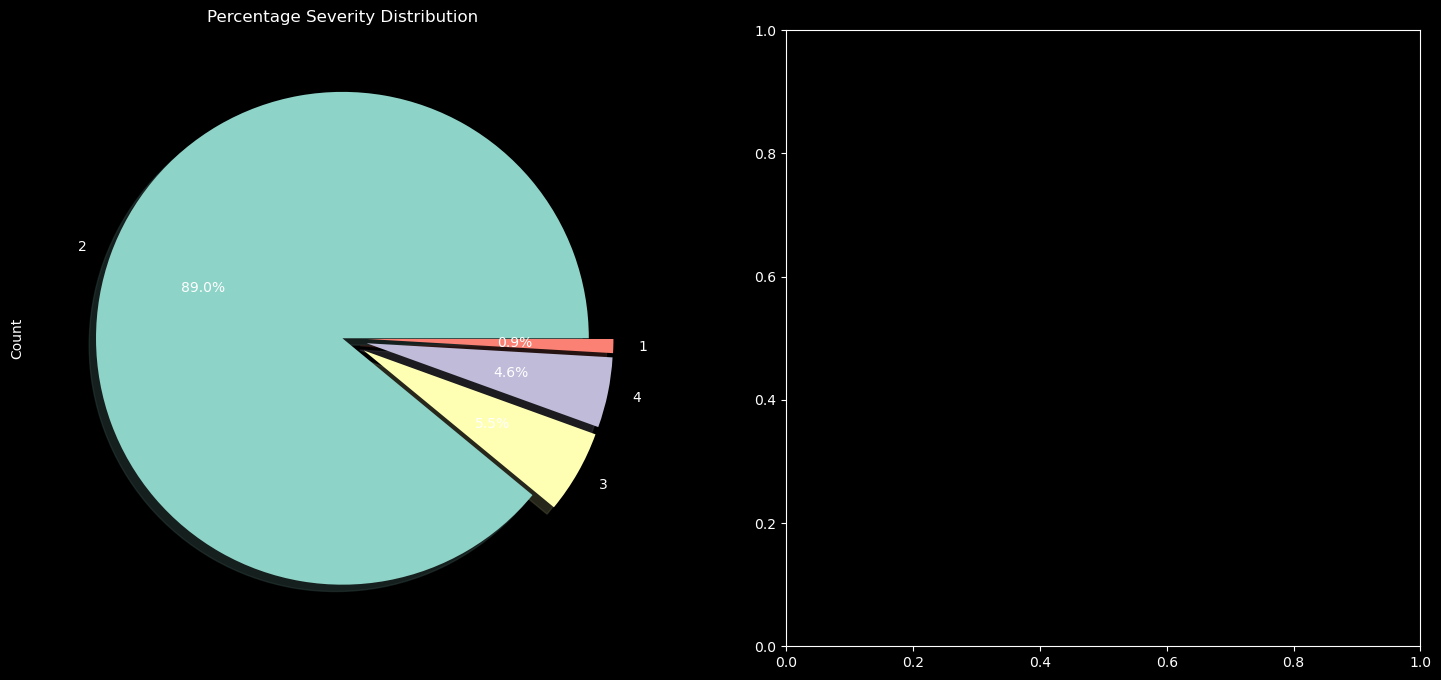

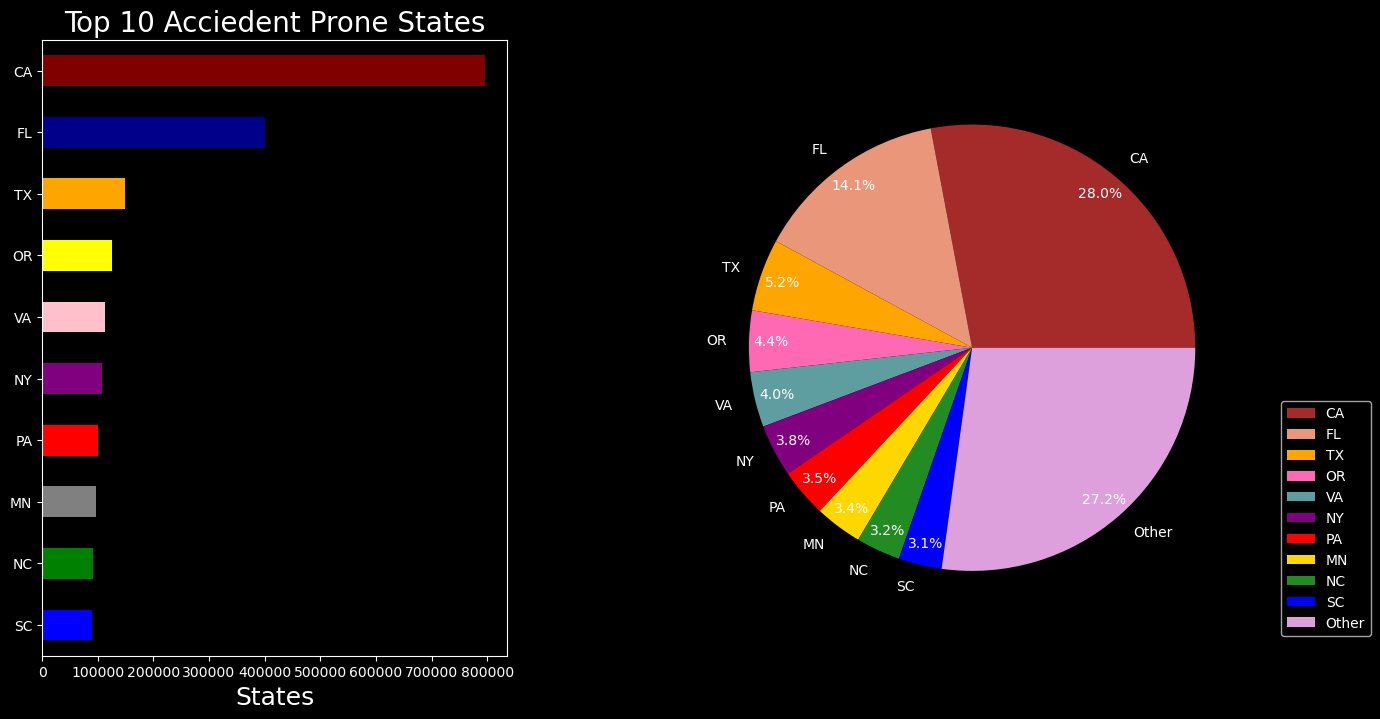

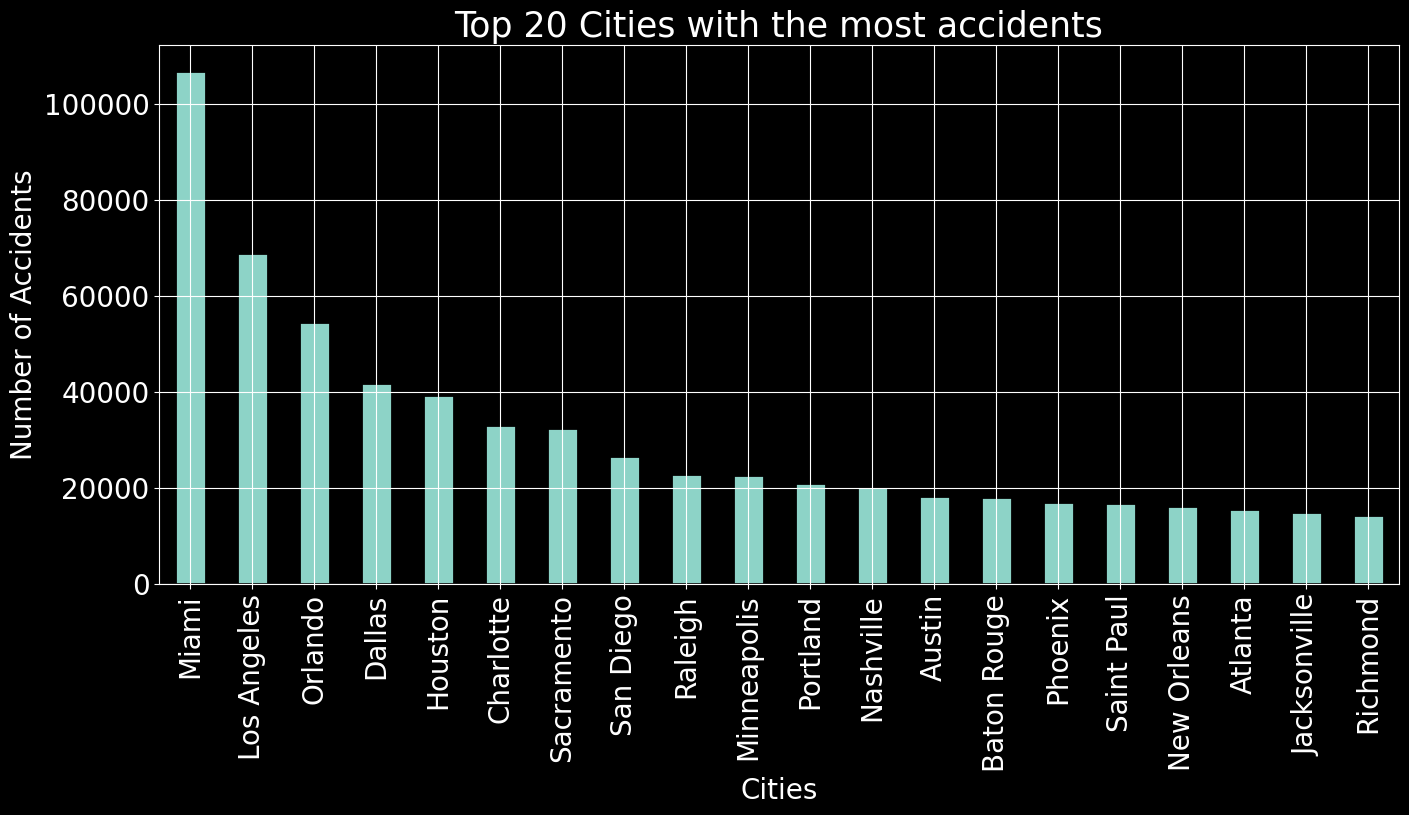

In [43]:
fig, ax=plt.subplots(figsize=(16,7))
data['City'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Top 20 Cities with the most accidents',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

#### Checking the weather conditions that are most common

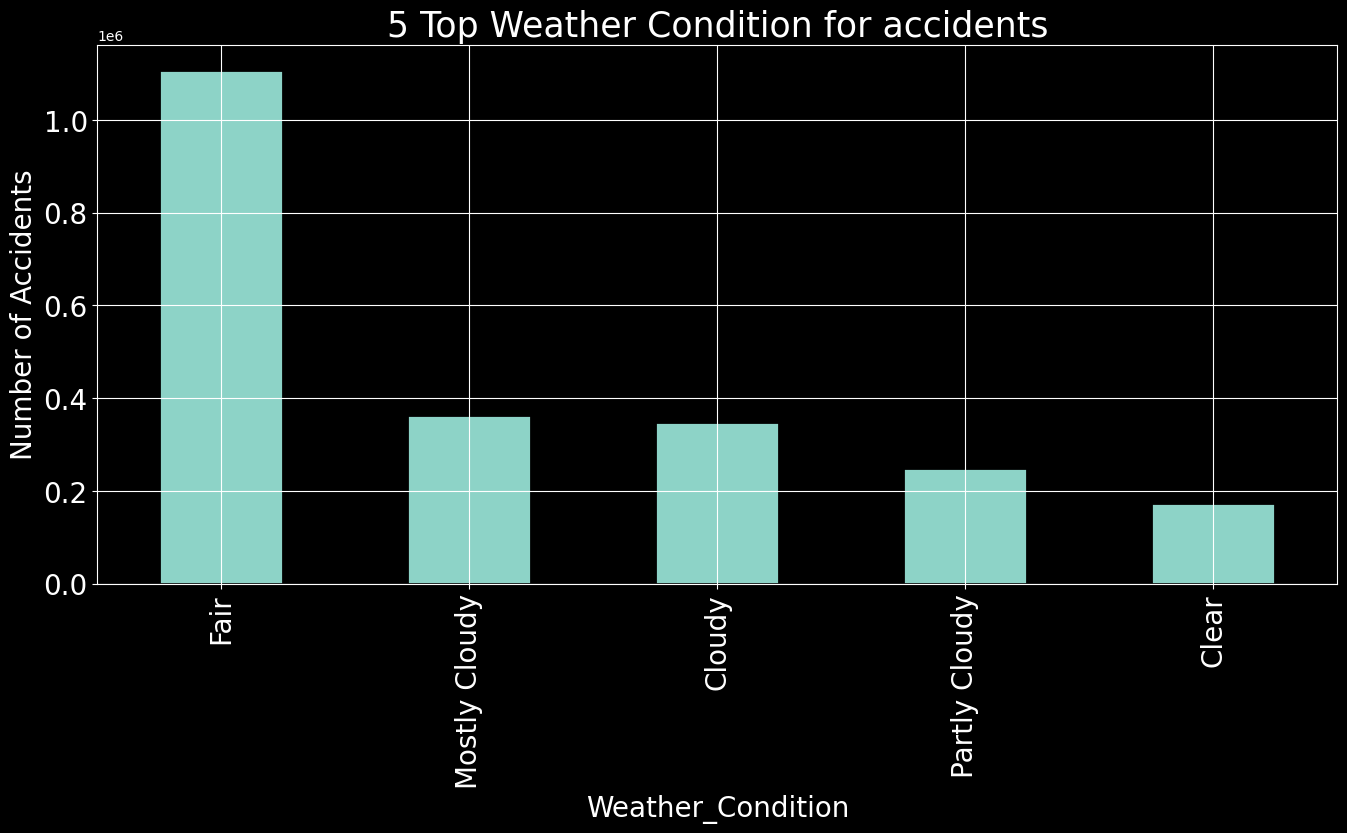

In [45]:
fig, ax=plt.subplots(figsize=(16,7))
data['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

### Exploring the target feature which is Severity


#### At what time are the accidents most common along with severity

In [46]:
hours = list(set(pd.to_datetime(data['Start_Time']).dt.hour))
severity_1_hours = []
severity_2_hours = []
severity_3_hours = []
severity_4_hours = []
for i in hours:
    severity_1_hours.append(data[(data['Severity']==1)&(data['acc_hr_day']==i)].count()['ID'])
    severity_2_hours.append(data[(data['Severity']==2)&(data['acc_hr_day']==i)].count()['ID'])
    severity_3_hours.append(data[(data['Severity']==3)&(data['acc_hr_day']==i)].count()['ID'])
    severity_4_hours.append(data[(data['Severity']==4)&(data['acc_hr_day']==i)].count()['ID'])

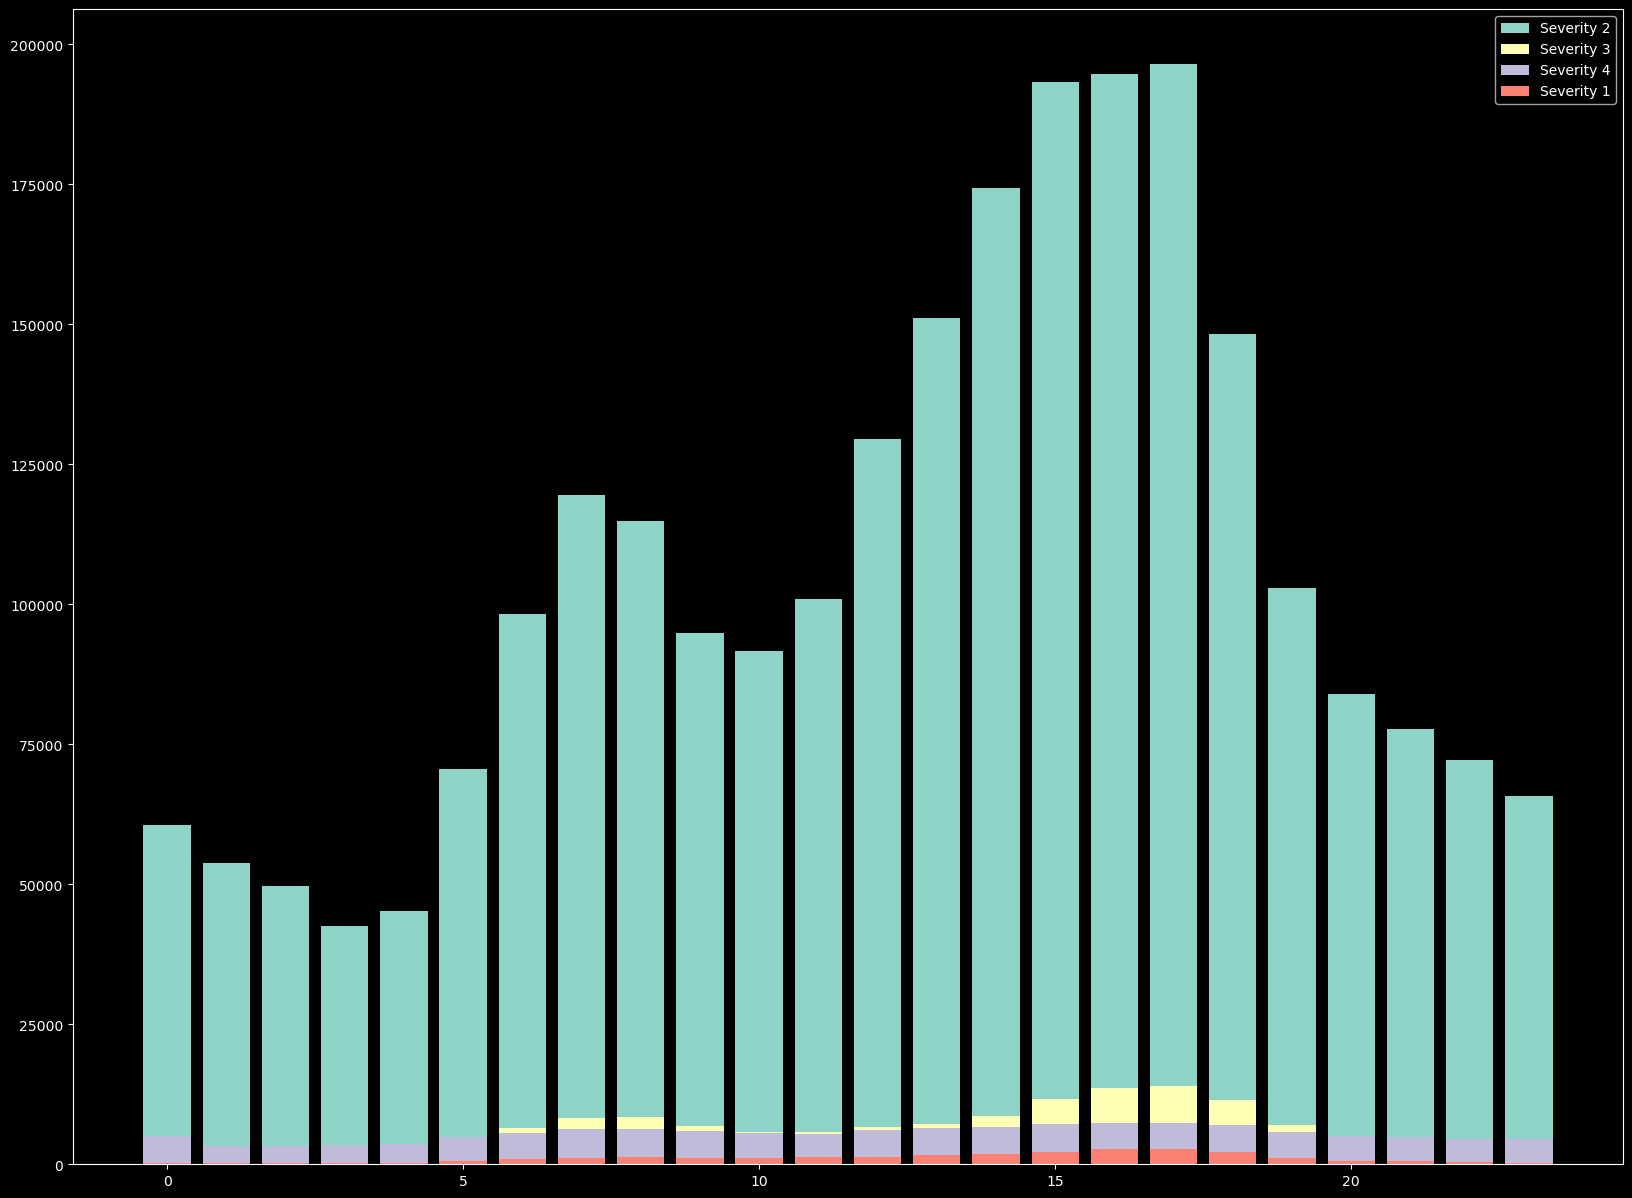

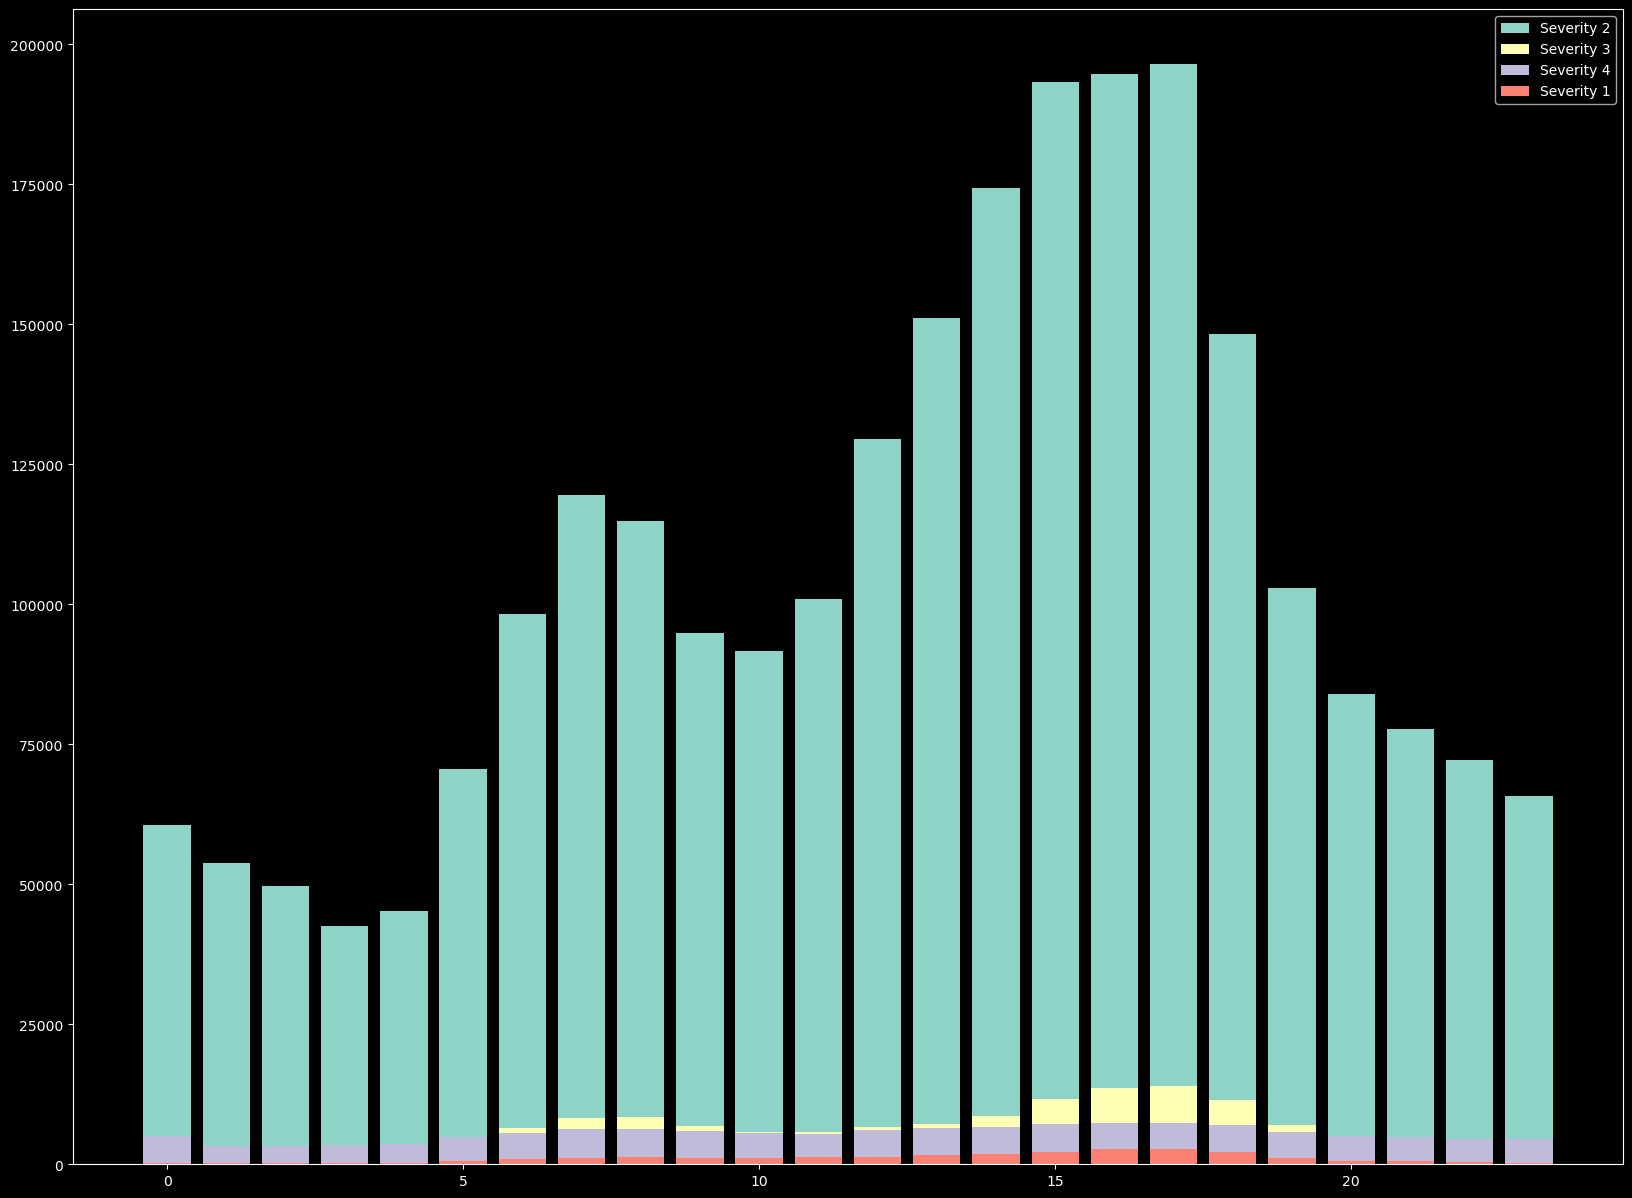

In [48]:
plt.figure(figsize=(20,15))

plt.bar(hours, severity_2_hours, label='Severity 2')
plt.bar(hours, severity_3_hours, label='Severity 3')
plt.bar(hours, severity_4_hours, label='Severity 4')
plt.bar(hours, severity_1_hours, label='Severity 1')


plt.legend()
plt.show()

#### Severity with state

In [49]:
states = data.State.unique()

In [50]:
count_by_state=[]
for i in data.State.unique():
    count_by_state.append(data[data['State']==i].count()['ID'])

In [51]:
severity_1_state = []
severity_2_state = []
severity_3_state = []
severity_4_state = []
for i in states:
    severity_1_state.append(data[(data['Severity']==1)&(data['State']==i)].count()['ID'])
    severity_2_state.append(data[(data['Severity']==2)&(data['State']==i)].count()['ID'])
    severity_3_state.append(data[(data['Severity']==3)&(data['State']==i)].count()['ID'])
    severity_4_state.append(data[(data['Severity']==4)&(data['State']==i)].count()['ID'])

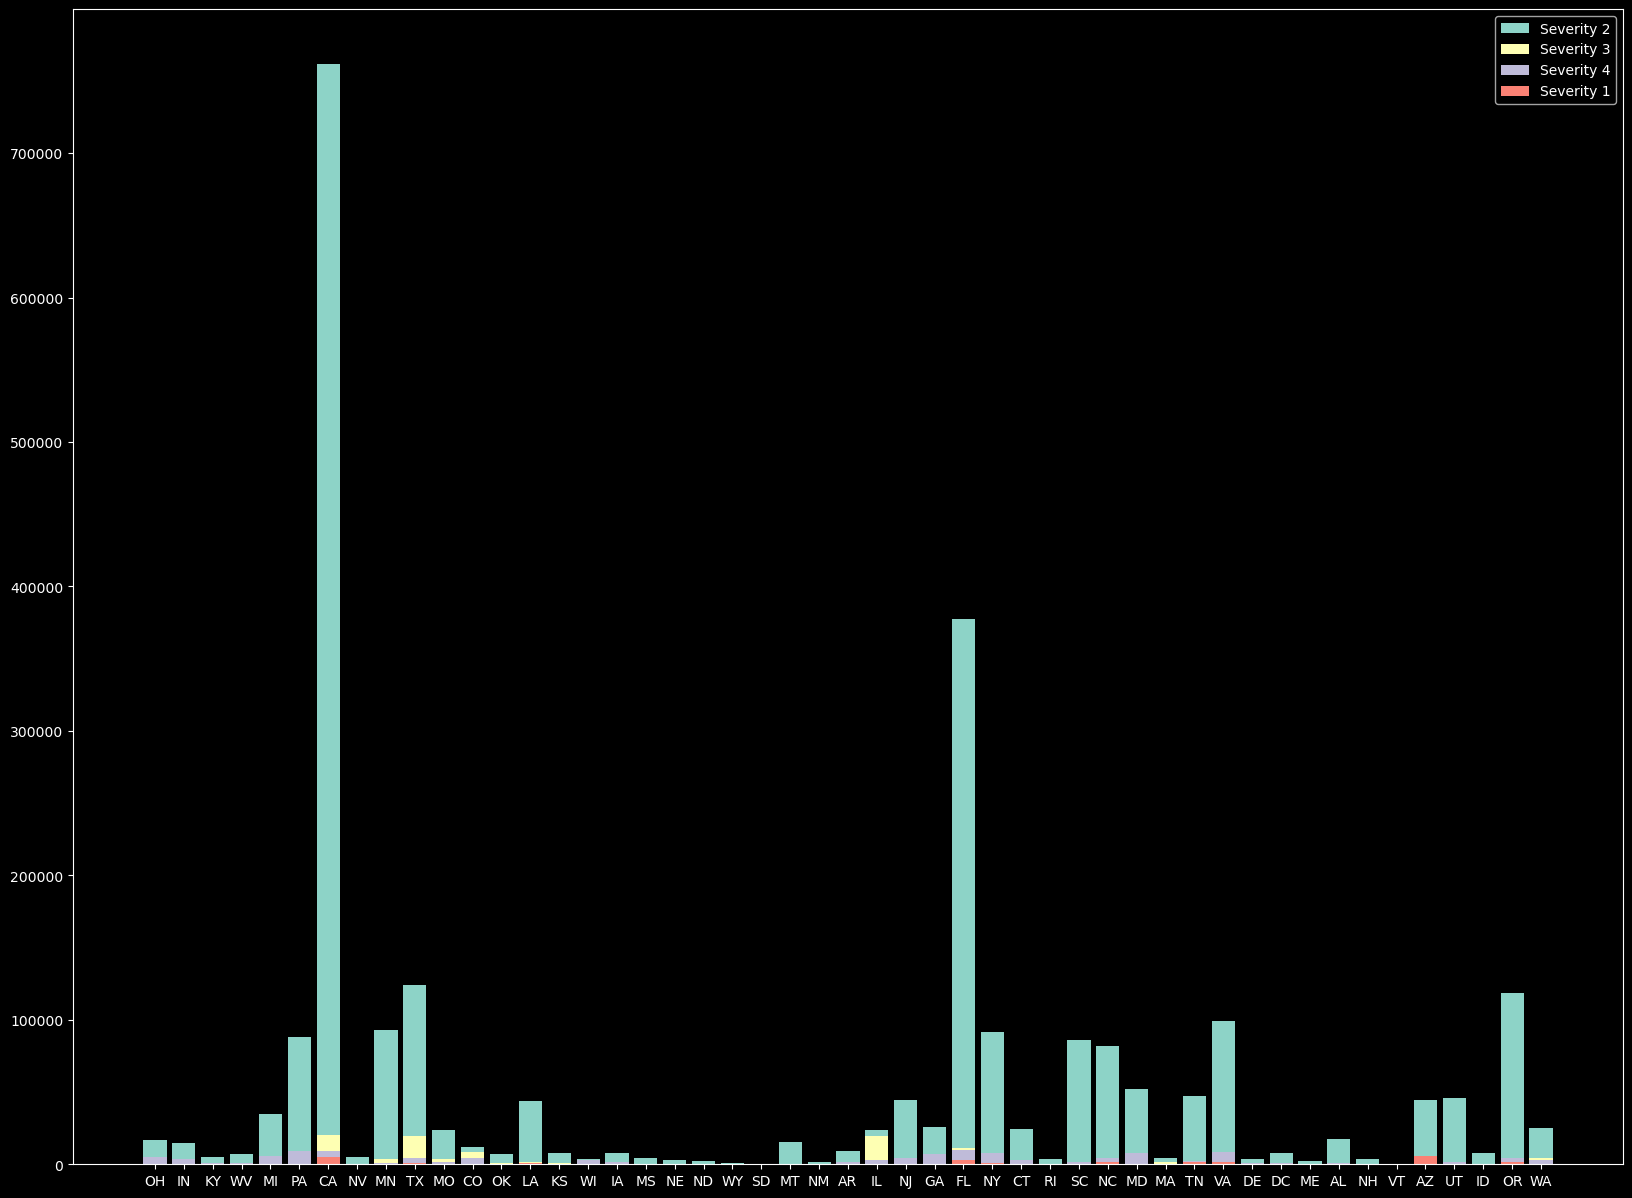

In [52]:
# In almost all of the states, accidents of severity 2 are the highest followed by severity 3

plt.figure(figsize=(20,15))

plt.bar(states, severity_2_state, label='Severity 2')
plt.bar(states, severity_3_state, label='Severity 3')
plt.bar(states, severity_4_state, label='Severity 4')
plt.bar(states, severity_1_state, label='Severity 1')


plt.legend()
plt.show()

#### Severity with temperature

In [53]:
Temperature = data['Temperature(F)']
severity_1_data = data[data['Severity']==1]['Temperature(F)'].mean()
severity_2_data = data[data['Severity']==2]['Temperature(F)'].mean()
severity_3_data = data[data['Severity']==3]['Temperature(F)'].mean()
severity_4_data = data[data['Severity']==4]['Temperature(F)'].mean()
severity_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

Mean_temp_by_severity = [severity_1_data, severity_2_data, severity_3_data, severity_4_data]

#### Severity with weather

In [56]:
Weather = data.Weather_Condition.value_counts()

In [57]:
severity_1_Weather = []
severity_2_Weather = []
severity_3_Weather = []
severity_4_Weather = []
for i in Weather.index:
    severity_1_Weather.append(data[(data['Severity']==1)&(data['Weather_Condition']==i)].count()['ID'])
    severity_2_Weather.append(data[(data['Severity']==2)&(data['Weather_Condition']==i)].count()['ID'])
    severity_3_Weather.append(data[(data['Severity']==3)&(data['Weather_Condition']==i)].count()['ID'])
    severity_4_Weather.append(data[(data['Severity']==4)&(data['Weather_Condition']==i)].count()['ID'])

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

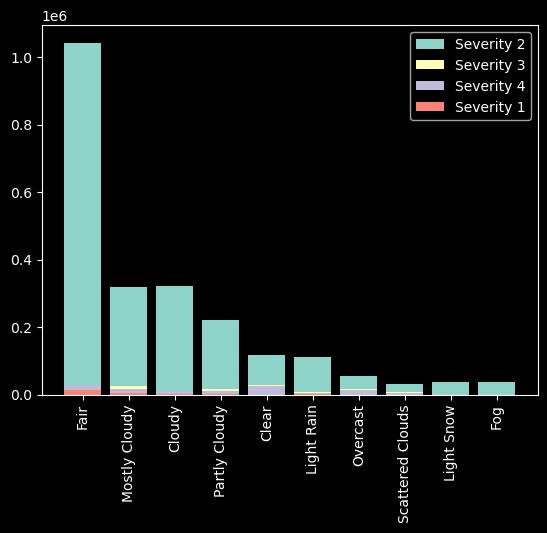

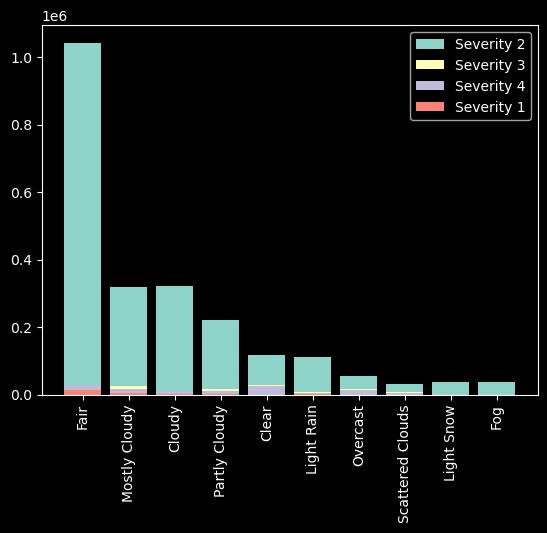

In [59]:
plt.figure()
plt.xticks(rotation=90)
plt.bar(Weather.index[:10], severity_2_Weather[:10], label='Severity 2')
plt.bar(Weather.index[:10], severity_3_Weather[:10], label='Severity 3')
plt.bar(Weather.index[:10], severity_4_Weather[:10], label='Severity 4')
plt.bar(Weather.index[:10], severity_1_Weather[:10], label='Severity 1')
plt.legend()
plt.show()

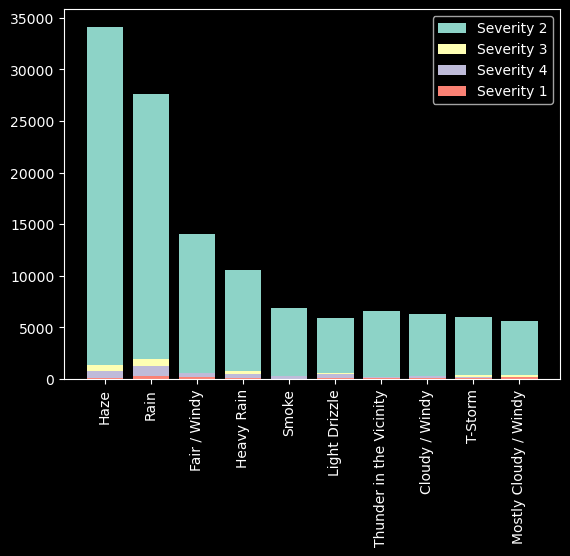

In [60]:
plt.figure()
plt.xticks(rotation=90)
plt.bar(Weather.index[10:20], severity_2_Weather[10:20], label='Severity 2')
plt.bar(Weather.index[10:20], severity_3_Weather[10:20], label='Severity 3')
plt.bar(Weather.index[10:20], severity_4_Weather[10:20], label='Severity 4')
plt.bar(Weather.index[10:20], severity_1_Weather[10:20], label='Severity 1')
plt.legend()
plt.show()

In [61]:
percentage_severity_1 = []
percentage_severity_2 = []
percentage_severity_3 = []
percentage_severity_4 = []
for i in range(len(severity_1_Weather)):
    percentage_severity_1.append((severity_1_Weather[i]/Weather[i])*100)
    percentage_severity_2.append((severity_2_Weather[i]/Weather[i])*100)
    percentage_severity_3.append((severity_3_Weather[i]/Weather[i])*100)
    percentage_severity_4.append((severity_4_Weather[i]/Weather[i])*100)

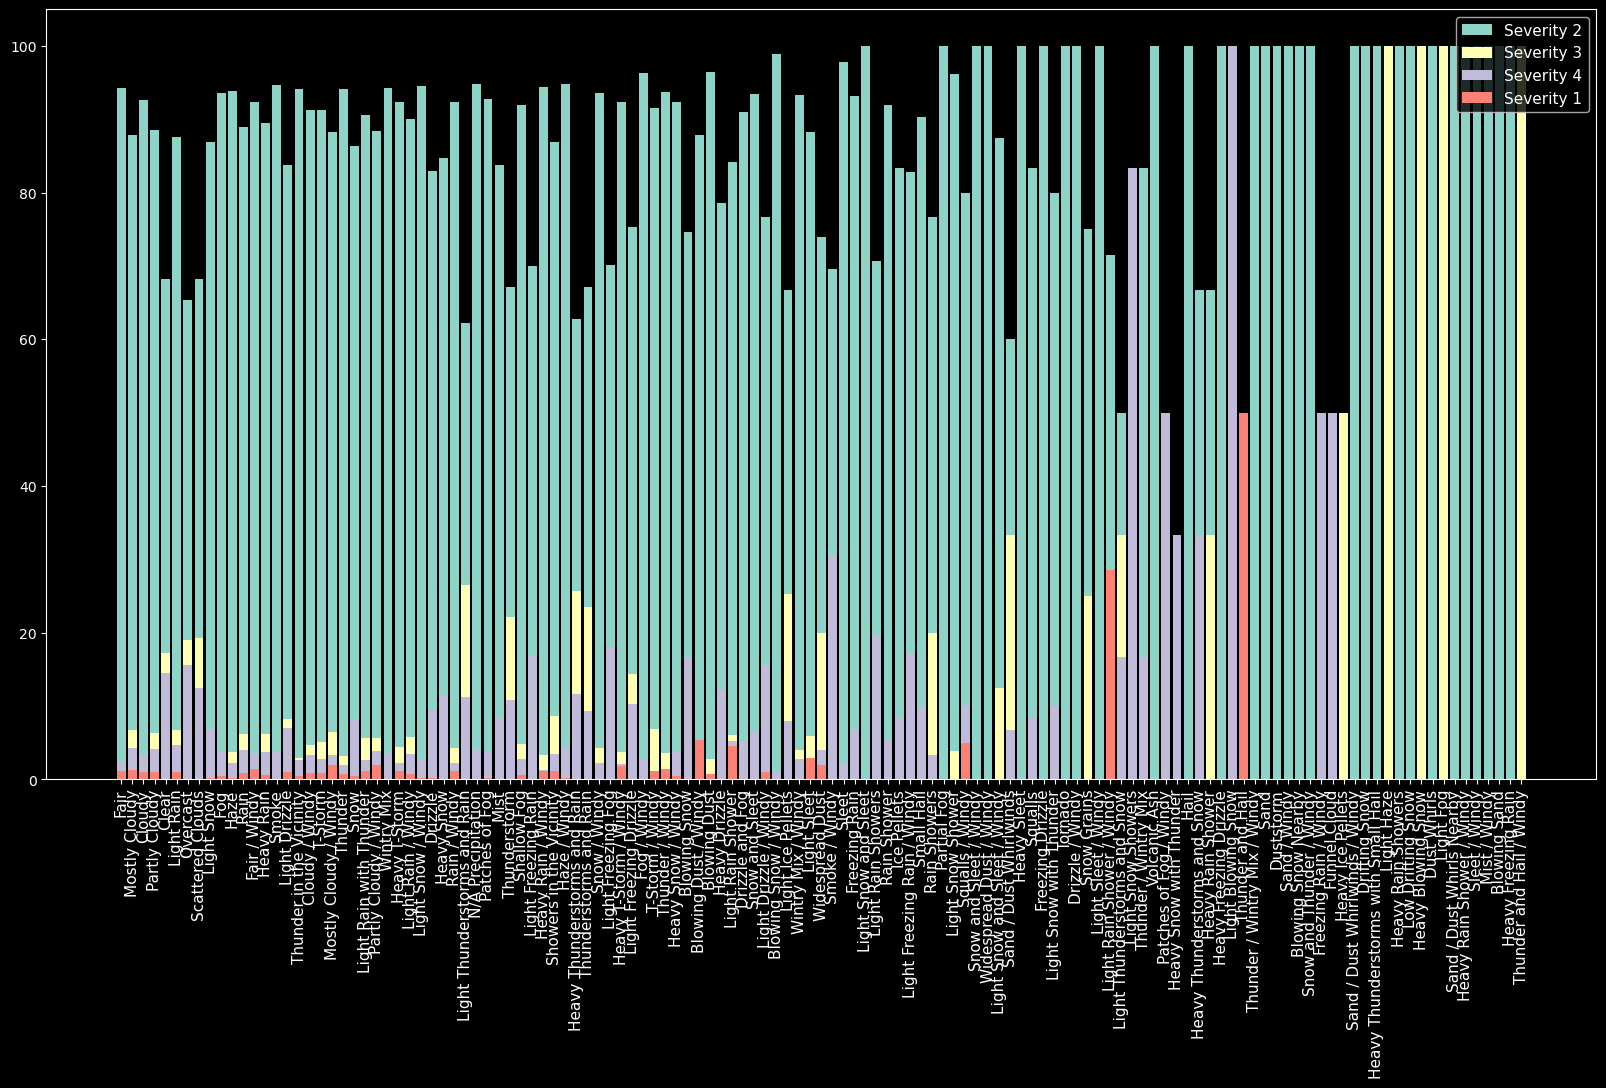

In [62]:
# Here we can note that extreme weather conditions such Lignt Snow Showers,
# thunders, light ice pallets, heavy thunderstorms etc. have a very high severity of accidents 
# as compared to relatively normal conditions

plt.figure(figsize=(20,10))
plt.xticks(fontsize=11, rotation=90)
plt.bar(Weather.index, percentage_severity_2, label='Severity 2')
plt.bar(Weather.index, percentage_severity_3, label='Severity 3')
plt.bar(Weather.index, percentage_severity_4, label='Severity 4')
plt.bar(Weather.index, percentage_severity_1, label='Severity 1')
plt.legend(loc=1, prop={'size': 11})
plt.show()

#### Severity by Year

In [63]:
# Examine data
data.groupby(["acc_year","Severity"]).size().unstack()

Severity,1,2,3,4
acc_year,,,,
2016,NaN,86758.0,21468.0,13798.0
2017,NaN,110365.0,30389.0,23164.0
2018,NaN,108568.0,30173.0,24435.0
2019,NaN,204759.0,30269.0,23587.0
2020,26053.0,534828.0,42806.0,22177.0
2021,NaN,1487713.0,NaN,24032.0


In [64]:
Years = data.acc_year.unique()

In [65]:
count_by_acc_year=[]
for i in data.acc_year.unique():
    count_by_acc_year.append(data[data['acc_year']==i].count()['ID'])

In [66]:
severity_1 = []
severity_2 = []
severity_3 = []
severity_4 = []
for i in Years:
    severity_1.append(data[(data['Severity']==1)&(data['acc_year']==i)].count()['ID'])
    severity_2.append(data[(data['Severity']==2)&(data['acc_year']==i)].count()['ID'])
    severity_3.append(data[(data['Severity']==3)&(data['acc_year']==i)].count()['ID'])
    severity_4.append(data[(data['Severity']==4)&(data['acc_year']==i)].count()['ID'])

#data.groupby(["acc_year","Severity"]).size().unstack().plot(kind='bar',stacked=True)

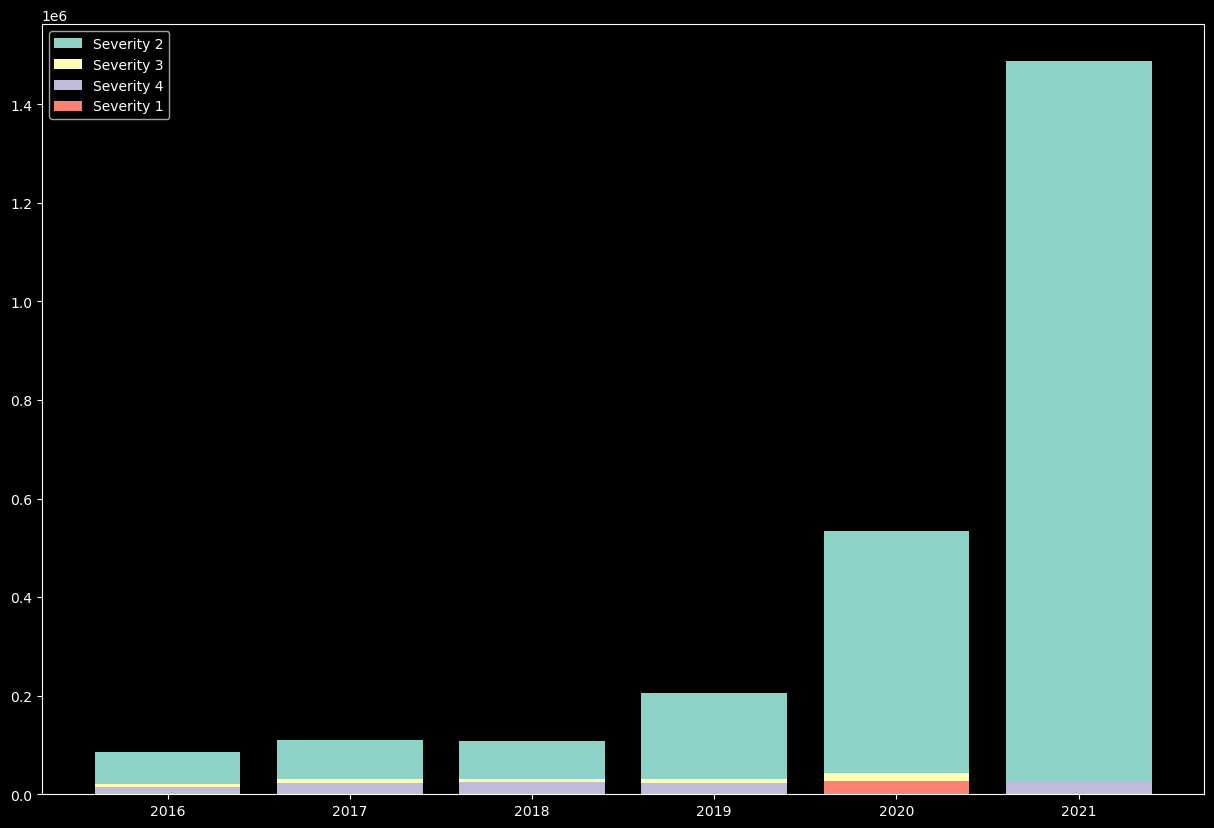

In [67]:
plt.figure(figsize=(15,10))

plt.bar(Years, severity_2, label='Severity 2')
plt.bar(Years, severity_3, label='Severity 3')
plt.bar(Years, severity_4, label='Severity 4')
plt.bar(Years, severity_1, label='Severity 1')


plt.legend()
plt.show()